In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

Loading Dataset

In [48]:
titanic = pd.read_csv(url)

In [49]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
titanic.Survived.unique()

array([0, 1], dtype=int64)

In [50]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [51]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanic.shape

(891, 12)

In [53]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

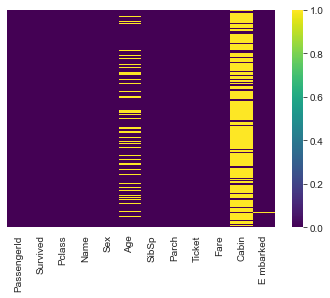

In [54]:
df = titanic.isnull()
sns.heatmap(df,cmap='viridis',yticklabels=False)

There are many null values in 'Age' and 'Cabin' section

### Feature Engineering

As cabin is irrelevant to dataset we can safely drop it

In [55]:
titanic = titanic.drop('Cabin',axis=1)

<AxesSubplot:>

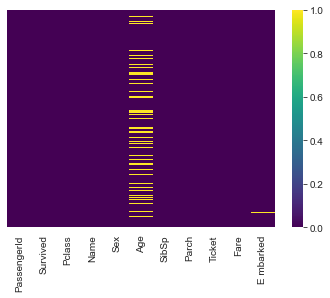

In [56]:
df = titanic.isnull()
sns.heatmap(df,cmap='viridis',yticklabels=False)

we should categorize the Age Feautre 

In [57]:
def imputate_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age)==1:
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [58]:
titanic["Age"] = titanic[['Age','Pclass']].apply(imputate_age,axis=1)

<AxesSubplot:>

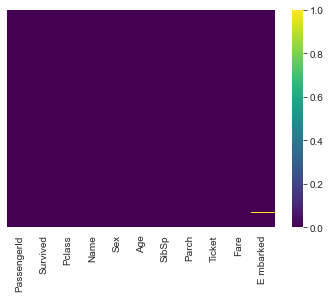

In [59]:
df = titanic.isnull()
sns.heatmap(df,cmap='viridis',yticklabels=False)

In [60]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
E mbarked      2
dtype: int64

In [61]:
titanic.dropna(inplace=True)

In [62]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
E mbarked      0
dtype: int64

We can see there are no 'Nan' values 

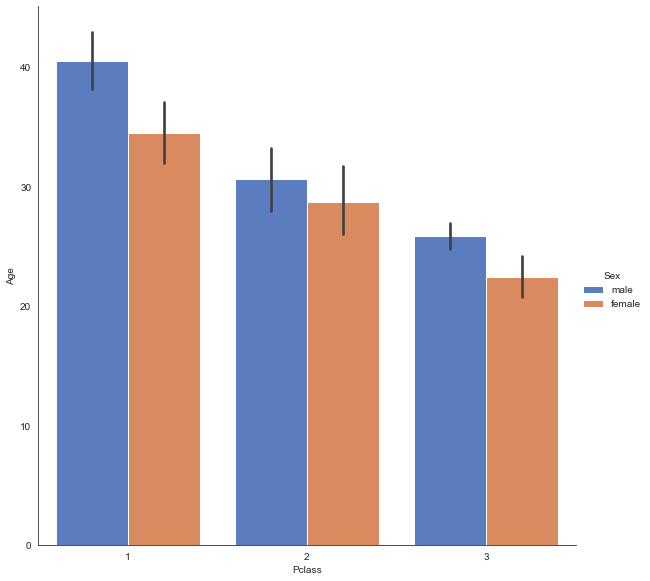

In [64]:
sns.set_style('white')
sns.catplot(x='Pclass',y='Age',data=titanic,kind='bar',height=8,palette='muted',hue='Sex')

c:\users\jaypr_ughx7yt\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

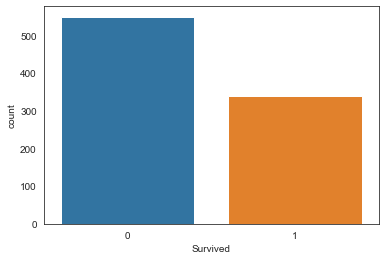

In [65]:
sns.countplot(titanic['Survived'])

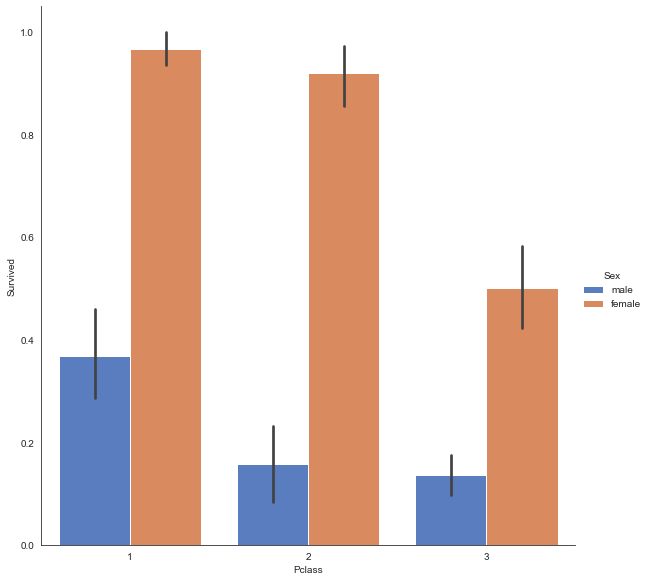

In [66]:
sns.catplot(x='Pclass',y='Survived',data=titanic,kind='bar',height=8,palette='muted',hue='Sex')

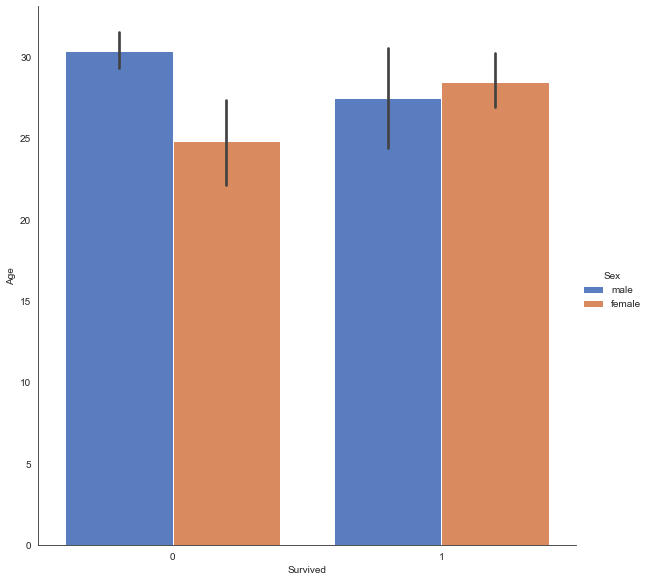

In [67]:
sns.catplot(x='Survived',y='Age',data=titanic,kind='bar',height=8,palette='muted',hue='Sex')

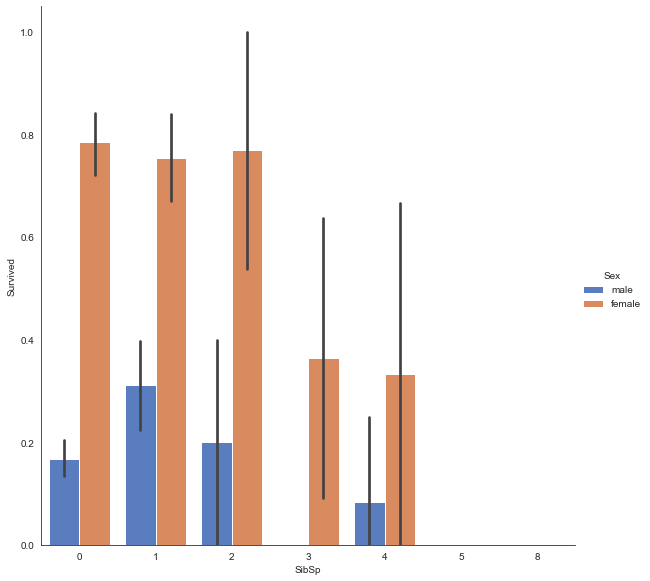

In [68]:
sns.catplot(x='SibSp',y='Survived',data=titanic,kind='bar',palette='muted',height=8,hue='Sex')

'''use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare'

In [69]:
X = titanic.drop(['PassengerId', 'Survived','Name', 'Ticket','E mbarked'],axis=1)
y = titanic['Survived']

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  889 non-null    int64  
 1   Sex     889 non-null    object 
 2   Age     889 non-null    float64
 3   SibSp   889 non-null    int64  
 4   Parch   889 non-null    int64  
 5   Fare    889 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 80.9+ KB


from above we can see that 'Sex' is object i.e categorical
we need to change into numerical type

In [71]:
X['Sex'] = pd.get_dummies(X['Sex']).values

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  889 non-null    int64  
 1   Sex     889 non-null    uint8  
 2   Age     889 non-null    float64
 3   SibSp   889 non-null    int64  
 4   Parch   889 non-null    int64  
 5   Fare    889 non-null    float64
dtypes: float64(2), int64(3), uint8(1)
memory usage: 74.8 KB


In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [77]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [78]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [79]:
x_train.shape

(622, 6)

In [80]:
y_train.shape

(622,)

### Applying Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.8239700374531835

### Applying Decision Tree 

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

0.7528089887640449

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [84]:
y_pred = dtc.predict(x_test)

In [85]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [86]:
Accuracy_score = accuracy_score(y_test,y_pred)
Accuracy_score

0.7528089887640449

In [87]:
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[129,  34],
       [ 32,  72]], dtype=int64)

In [88]:
print(f"Cf_report : {classification_report(y_test,y_pred)}")

Cf_report :               precision    recall  f1-score   support

           0       0.80      0.79      0.80       163
           1       0.68      0.69      0.69       104

    accuracy                           0.75       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.75      0.75      0.75       267



### Standardizing the X column before hyper tuning

In [89]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)
x = pd.DataFrame(x_transform,columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])

In [91]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.825209,-0.735342,-0.531670,0.431350,-0.474326,-0.500240
1,-1.572211,1.359911,0.680232,0.431350,-0.474326,0.788947
2,0.825209,1.359911,-0.228695,-0.475199,-0.474326,-0.486650
3,-1.572211,1.359911,0.453001,0.431350,-0.474326,0.422861
4,0.825209,-0.735342,0.453001,-0.475199,-0.474326,-0.484133


In [92]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state= 101)
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(x_train,y_train)
Dtc.score(x_test,y_test)

0.7602996254681648

We can see there is slight increase in model accuracy score 

In [94]:
#by tuning hyper parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

### Using GridSearchCV 

In [95]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=Dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [96]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

### Finding Best Parameters

In [97]:
best_parameters=grid_search.best_params_
print(best_parameters)

grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}


0.8231870967741935

### Aplying best params in Decision Tree

In [98]:
Dtc2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =4, min_samples_leaf= 6,min_samples_split=7, splitter ='random')
Dtc2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       min_samples_split=7, splitter='random')

In [99]:
Dtc2.score(x_test,y_test)

0.8089887640449438

After Hyper parameters we can see there is increase in model accuracy 

In [101]:
import pickle

with open('DTCmodelForprediction.pkl','wb') as f:
    pickle.dump(Dtc2,f)

with open ('StandardScaler.pkl','wb') as f:
    pickle.dump(scalar,f)
    